In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%store -r filtered_df

#### Feature engineering

In [23]:
# Define BMI categories
filtered_df['BMI_Category'] = pd.cut(filtered_df['BMI'], bins=[0, 18.5, 24.9, 29.9, float('inf')], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Define age groups
filtered_df['Age_Group'] = pd.cut(filtered_df['Age'], bins=[0, 35, 65, float('inf')], labels=['Young', 'Adult', 'Elderly'])

# Define Yes or No for diabetes
filtered_df['Patient_with_diabetes'] = filtered_df['Outcome'].replace({0: 'No', 1: 'Yes'})

# Define the bins and labels for Glucose levels
glucose_bins = [0, 70, 100, 125, float('inf')]
glucose_labels = ['Low', 'Normal', 'Prediabetes', 'Diabetes']

# Create a new column 'Glucose_Level' based on the binning
filtered_df['Glucose_Level'] = pd.cut(filtered_df['Glucose'], bins=glucose_bins, labels=glucose_labels)

# Define the bins and labels for Insulin levels
insulin_bins = [0, 50, 150, 300, float('inf')]
insulin_labels = ['Low', 'Normal', 'Elevated', 'High']

# Create a new column 'Insulin_Level' based on the binning
filtered_df['Insulin_Level'] = pd.cut(filtered_df['Insulin'], bins=insulin_bins, labels=insulin_labels)

filtered_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category,Age_Group,Patient_with_diabetes,Glucose_Level,Insulin_Level
3,1.0,89.00000,66.000000,23.000000,94.0,28.100000,0.167,21.000000,0,Overweight,Young,No,Normal,Normal
6,3.0,117.47973,70.615894,32.000000,88.0,31.000000,0.248,26.000000,1,Obese,Young,Yes,Prediabetes,Normal
14,5.0,166.00000,72.000000,19.000000,175.0,25.800000,0.587,28.051282,1,Overweight,Young,Yes,Diabetes,Elevated
16,0.0,118.00000,84.000000,28.256667,230.0,32.371044,0.551,31.000000,1,Obese,Young,Yes,Prediabetes,Elevated
19,1.0,115.00000,70.000000,30.000000,96.0,34.600000,0.529,32.000000,1,Obese,Young,Yes,Prediabetes,Normal


#### Distribution of BMI Categories

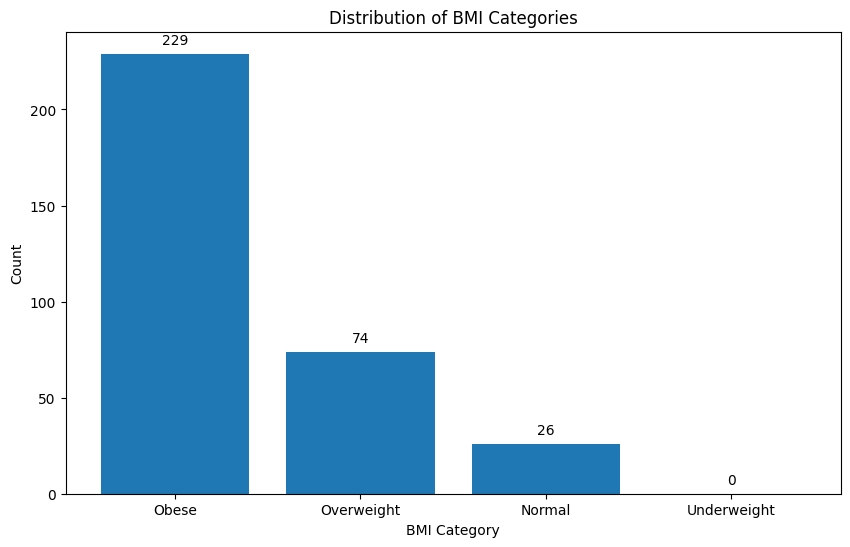

In [24]:
# Create a bar plot for BMI categories
plt.figure(figsize=(10, 6))
bmi_counts = filtered_df['BMI_Category'].value_counts()
bars = plt.bar(bmi_counts.index, bmi_counts.values)

# Add count labels to the top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, int(bar.get_height()), ha='center')

plt.title('Distribution of BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

#### Distribution of Age Groups

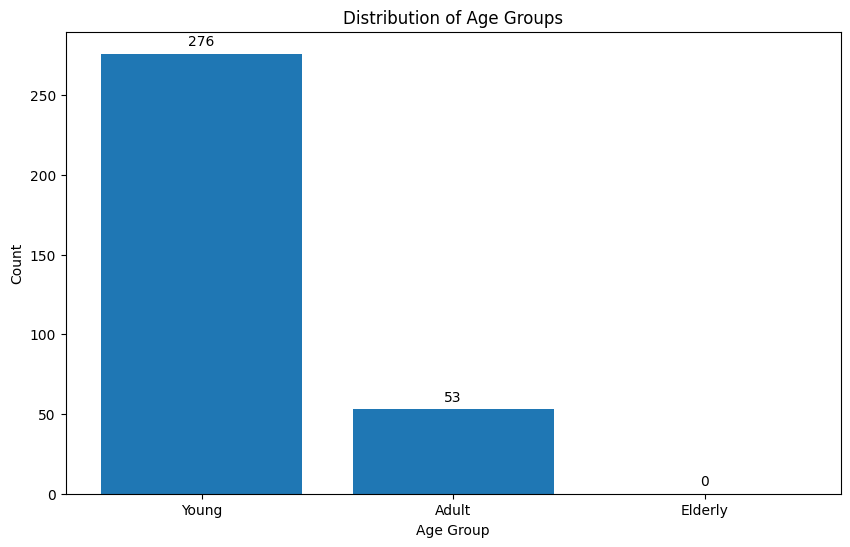

In [25]:
# Create a bar plot for age groups
plt.figure(figsize=(10, 6))
age_counts = filtered_df['Age_Group'].value_counts()
bars = plt.bar(age_counts.index, age_counts.values)

# Add count labels to the top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, int(bar.get_height()), ha='center')

plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

#### BMI Category vs. Patient with diabetes and Age Group vs. Patient with diabetes

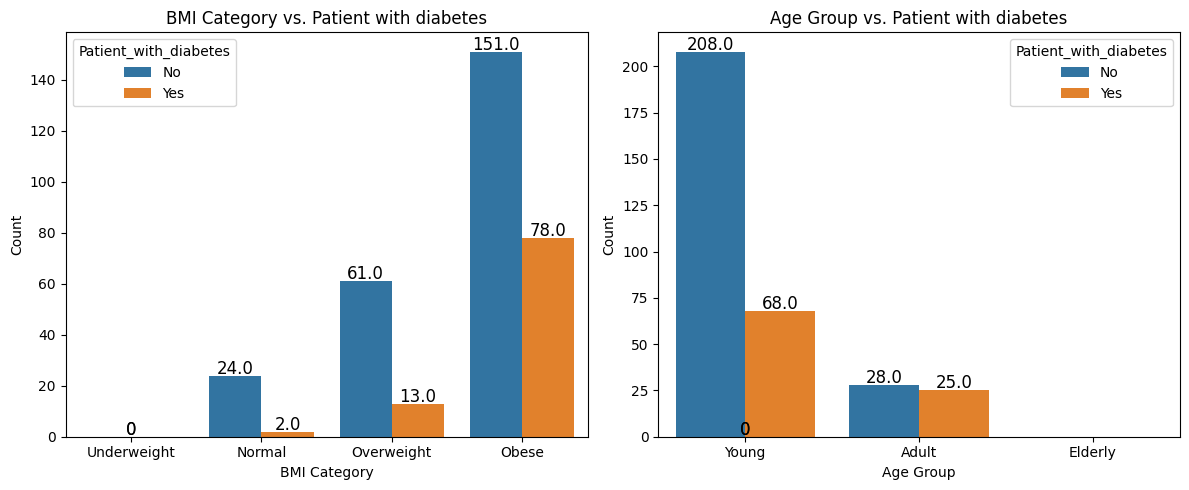

In [26]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first count plot
sns.countplot(data=filtered_df, x='BMI_Category', hue='Patient_with_diabetes', ax=axes[0])
axes[0].set_title('BMI Category vs. Patient with diabetes')
axes[0].set_xlabel('BMI Category')
axes[0].set_ylabel('Count')

# Plot the second count plot
sns.countplot(data=filtered_df, x='Age_Group', hue='Patient_with_diabetes', ax=axes[1])
axes[1].set_title('Age Group vs. Patient with diabetes')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Count')

# Add labels on top of the bars
for ax in axes:
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

#### BMI Category vs Patient with diabetes, Stacked by Age Group

C:\Users\leoau\AppData\Local\Temp\ipykernel_4384\3872256523.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = filtered_df.groupby(['BMI_Category', 'Patient_with_diabetes', 'Age_Group']).size().unstack(fill_value=0)


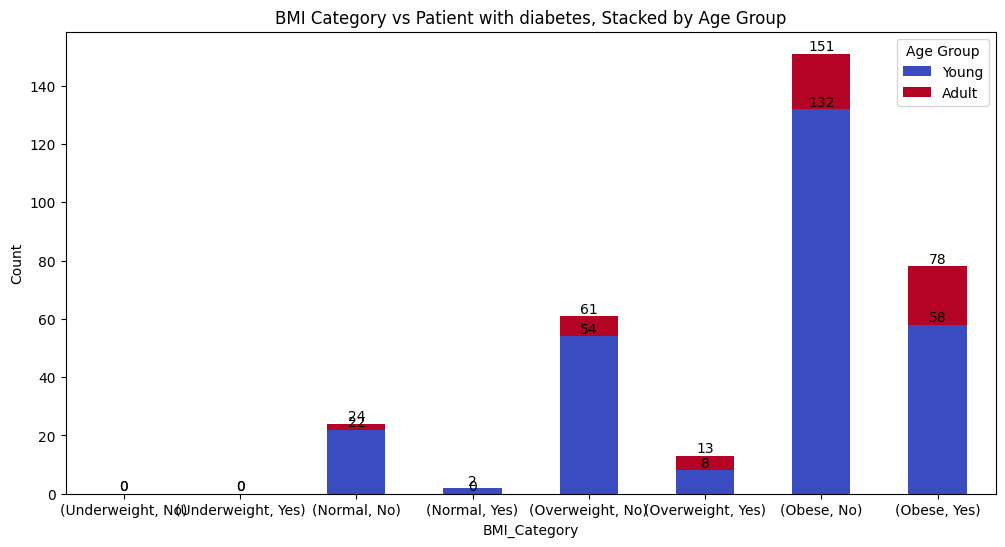

In [27]:
# Group the data by Age Group, Patient has diabetes, and BMI Category
grouped_data = filtered_df.groupby(['BMI_Category', 'Patient_with_diabetes', 'Age_Group']).size().unstack(fill_value=0)

# Filter out columns with all 0 values
grouped_data = grouped_data.loc[:, (grouped_data != 0).any()]

# Create a stacked bar plot with numbers displayed on top of the bars
plt.figure(figsize=(12, 6))
ax = grouped_data.plot(kind='bar', stacked=True, colormap='coolwarm', ax=plt.gca())

plt.title('BMI Category vs Patient with diabetes, Stacked by Age Group')
plt.xlabel('BMI_Category')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add numbers on top of the bars
for container in ax.containers:
    ax.bar_label(container, label_type="edge")

# Customize the legend
legend_labels = ['Young', 'Adult', 'Elderly']
plt.legend(title='Age Group', loc='upper right', labels=legend_labels)

plt.show()

#### Glucose_Level vs Patient with diabetes, Stacked by Age_Group

C:\Users\leoau\AppData\Local\Temp\ipykernel_4384\649641671.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = filtered_df.groupby(['Glucose_Level', 'Patient_with_diabetes', 'Age_Group']).size().unstack(fill_value=0)


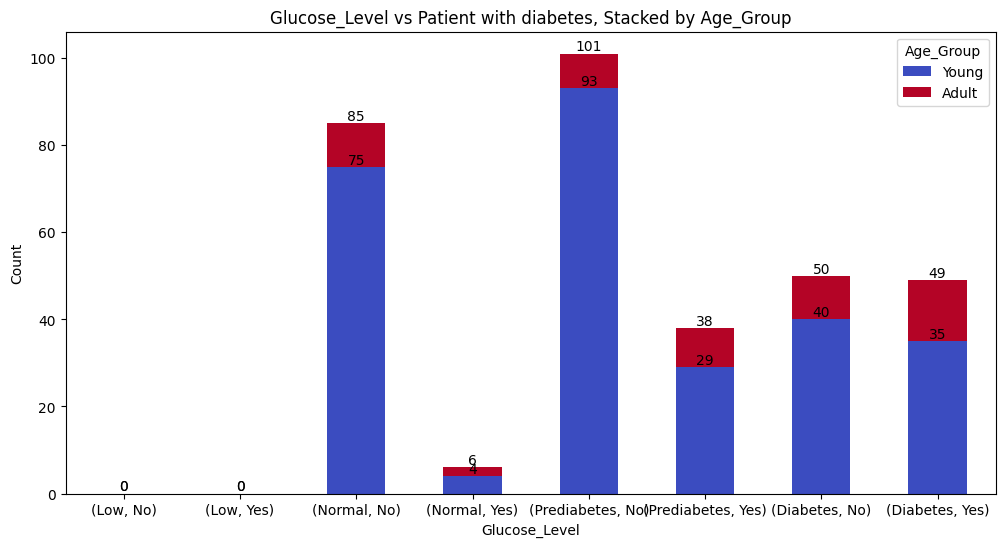

In [28]:
# Group the data by Age Group, Patient has diabetes, and BMI Category
grouped_data = filtered_df.groupby(['Glucose_Level', 'Patient_with_diabetes', 'Age_Group']).size().unstack(fill_value=0)

# Filter out columns with all 0 values
grouped_data = grouped_data.loc[:, (grouped_data != 0).any()]

# Create a stacked bar plot with numbers displayed on top of the bars
plt.figure(figsize=(12, 6))
ax = grouped_data.plot(kind='bar', stacked=True, colormap='coolwarm', ax=plt.gca())

plt.title('Glucose_Level vs Patient with diabetes, Stacked by Age_Group')
plt.xlabel('Glucose_Level')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add numbers on top of the bars
for container in ax.containers:
    ax.bar_label(container, label_type="edge")

# Customize the legend
legend_labels = ['Young', 'Adult', 'Elderly']
plt.legend(title='Age_Group', loc='upper right', labels=legend_labels)

plt.show()

#### Insulin_Level vs Patient with diabetes, Stacked by Age_Group

C:\Users\leoau\AppData\Local\Temp\ipykernel_4384\2949542408.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = filtered_df.groupby(['Insulin_Level', 'Patient_with_diabetes', 'Age_Group']).size().unstack(fill_value=0)


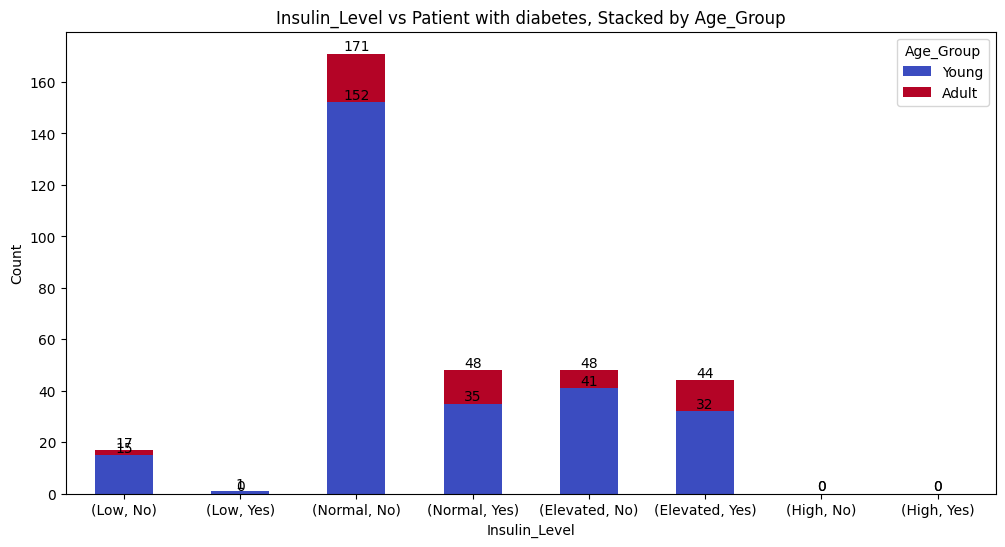

In [29]:
# Group the data by Age Group, Patient has diabetes, and BMI Category
grouped_data = filtered_df.groupby(['Insulin_Level', 'Patient_with_diabetes', 'Age_Group']).size().unstack(fill_value=0)

# Filter out columns with all 0 values
grouped_data = grouped_data.loc[:, (grouped_data != 0).any()]

# Create a stacked bar plot with numbers displayed on top of the bars
plt.figure(figsize=(12, 6))
ax = grouped_data.plot(kind='bar', stacked=True, colormap='coolwarm', ax=plt.gca())

plt.title('Insulin_Level vs Patient with diabetes, Stacked by Age_Group')
plt.xlabel('Insulin_Level')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add numbers on top of the bars
for container in ax.containers:
    ax.bar_label(container, label_type="edge")

# Customize the legend
legend_labels = ['Young', 'Adult', 'Elderly']
plt.legend(title='Age_Group', loc='upper right', labels=legend_labels)

plt.show()

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered_df = filtered_df.drop(columns=['BMI_Category', 'Age_Group', 'Patient_with_diabetes', 'Insulin_Level', 'Glucose_Level'])

In [31]:
%store filtered_df

Stored 'filtered_df' (DataFrame)
